In [1]:
%pylab inline
import pandas as pd

import plotnine as p

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

p.theme_set(p.theme_classic())

Populating the interactive namespace from numpy and matplotlib


/Users/vale/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from sklearn.decomposition import PCA, FastICA

In [3]:
pca = PCA(5, whiten=True)

In [4]:
from scipy import stats

In [5]:
G = 100
S = np.eye(G) * 1
mu1 = np.ones(G) * 1
mu2 = np.ones(G) * 0

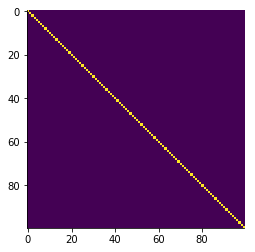

In [6]:
plt.imshow(S);

In [7]:
samples1 = stats.multivariate_normal(mu1, S).rvs(300)
samples2 = stats.multivariate_normal(mu2, S).rvs(300)

data = np.vstack((samples1, samples2))

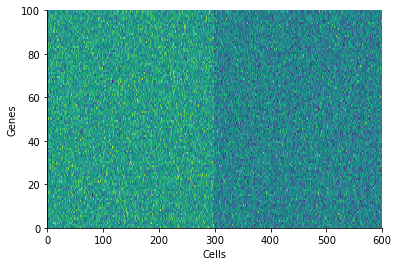

In [8]:
plt.pcolormesh(data.T);
plt.ylabel('Genes')
plt.xlabel('Cells');

In [9]:
Y = pca.fit_transform(data)
df = pd.DataFrame.from_records(Y, columns=['PC{}'.format(i + 1) for i in range(pca.n_components_)])
df['row'] = df.index

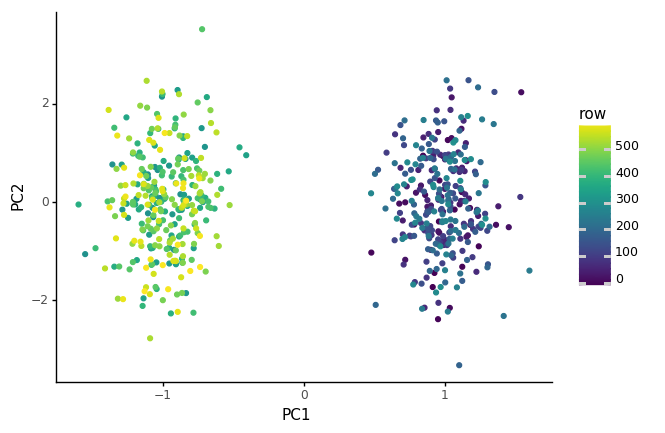

<ggplot: (-9223372036553425713)>

In [10]:
p.qplot('PC1', 'PC2', df, color='row')

In [11]:
F_G = 20
S = np.eye(G) * 1
mu1 = np.zeros(G)
mu1[:F_G] = 1.
mu2 = np.zeros(G)
mu2[G - F_G:] = 1.

In [12]:
samples1 = stats.multivariate_normal(mu1, S).rvs(300)
samples2 = stats.multivariate_normal(mu2, S).rvs(300)

data = np.vstack((samples1, samples2))

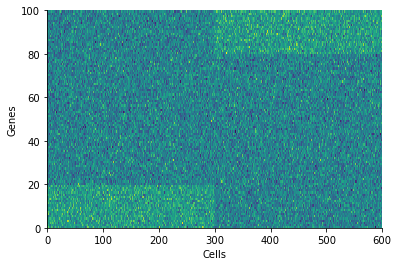

In [13]:
plt.pcolormesh(data.T);
plt.ylabel('Genes')
plt.xlabel('Cells');

In [14]:
Y = pca.fit_transform(data)
df = pd.DataFrame.from_records(Y, columns=['PC{}'.format(i + 1) for i in range(pca.n_components_)])
df['row'] = df.index

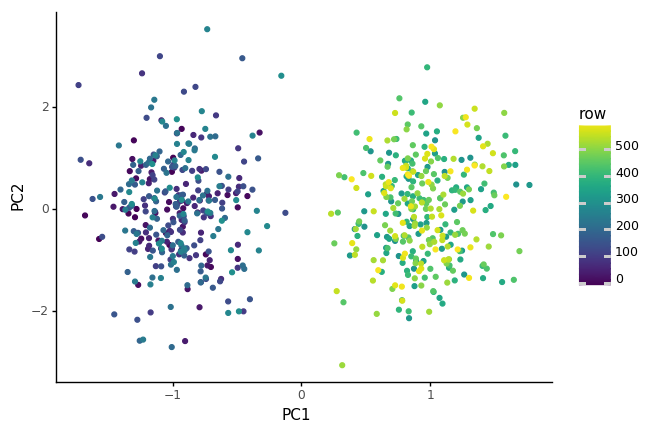

<ggplot: (301370204)>

In [15]:
p.qplot('PC1', 'PC2', df, color='row')

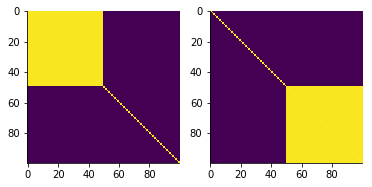

In [16]:
A = np.random.rand(50, 50)
O = A * 0
#ATA = A.dot(A.T) / 50
ATA = O + 0.99

S1 = np.bmat([[ATA, O], [O, O]])
np.fill_diagonal(S1, 1)

S2 = np.bmat([[O, O], [O, ATA]])
np.fill_diagonal(S2, 1)

mu1 = np.ones(G) * 1
mu2 = np.ones(G) * 1

plt.subplot(1, 2, 1)
plt.imshow(S1);
plt.subplot(1, 2, 2)
plt.imshow(S2);

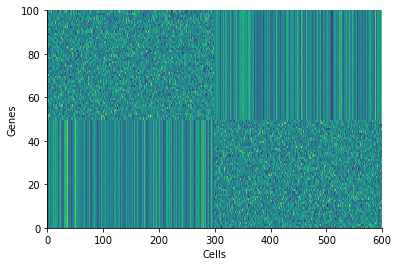

In [17]:
samples1 = stats.multivariate_normal(mu1, S1).rvs(300)
samples2 = stats.multivariate_normal(mu2, S2).rvs(300)

data = np.vstack((samples1, samples2))

plt.pcolormesh(data.T);
plt.ylabel('Genes')
plt.xlabel('Cells');

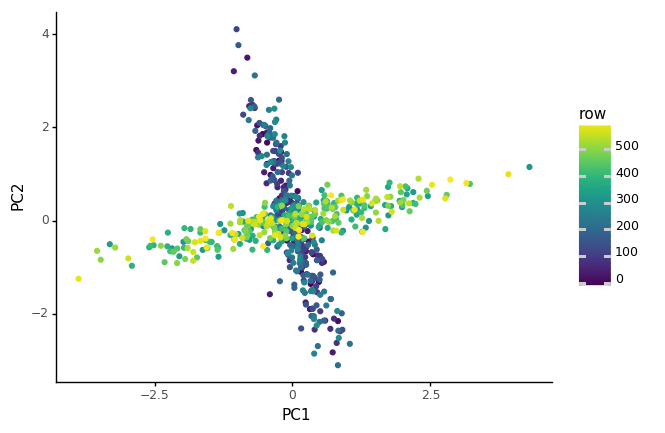

<ggplot: (304534697)>

In [18]:
Y = pca.fit_transform(data)
df = pd.DataFrame.from_records(Y, columns=['PC{}'.format(i + 1) for i in range(pca.n_components_)])
df['row'] = df.index

p.qplot('PC1', 'PC2', df, color='row')

In [19]:
mu1 = np.ones(G) * 1
mu2 = np.ones(G) * -0

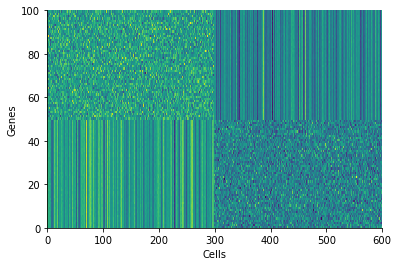

In [20]:
samples1 = stats.multivariate_normal(mu1, S1).rvs(300)
samples2 = stats.multivariate_normal(mu2, S2).rvs(300)

data = np.vstack((samples1, samples2))

plt.pcolormesh(data.T);
plt.ylabel('Genes')
plt.xlabel('Cells');

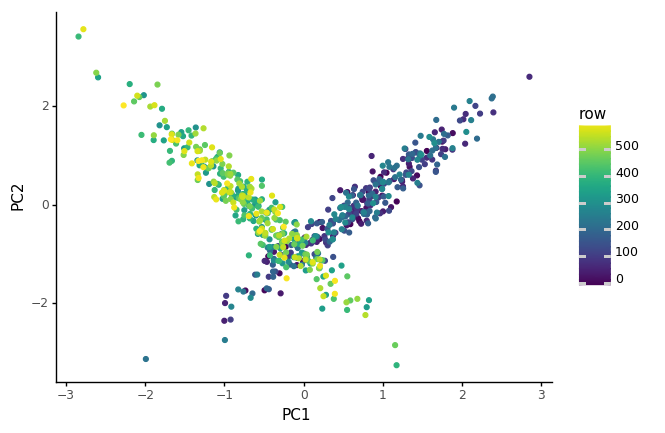

<ggplot: (304544965)>

In [21]:
Y = pca.fit_transform(data)
df = pd.DataFrame.from_records(Y, columns=['PC{}'.format(i + 1) for i in range(pca.n_components_)])
df['row'] = df.index

p.qplot('PC1', 'PC2', df, color='row')

In [22]:
mu1 = np.hstack((np.ones(50) * 0, np.ones(50) * 0))
mu2 = np.hstack((np.ones(50) * 0, np.ones(50) * 1))

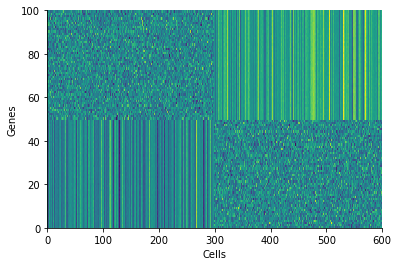

In [23]:
samples1 = stats.multivariate_normal(mu1, S1).rvs(300)
samples2 = stats.multivariate_normal(mu2, S2).rvs(300)

data = np.vstack((samples1, samples2))

plt.pcolormesh(data.T);
plt.ylabel('Genes')
plt.xlabel('Cells');

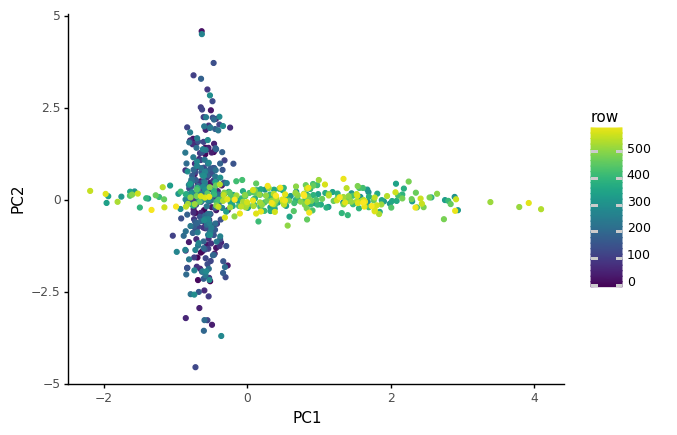

<ggplot: (304054862)>

In [24]:
Y = pca.fit_transform(data)
df = pd.DataFrame.from_records(Y, columns=['PC{}'.format(i + 1) for i in range(pca.n_components_)])
df['row'] = df.index

p.qplot('PC1', 'PC2', df, color='row')

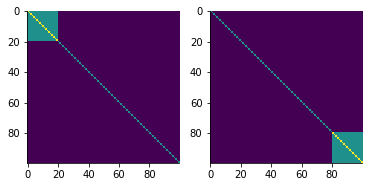

In [38]:
A = np.zeros((F_G, F_G))
O = np.zeros((G - F_G, G - F_G))
O_R = np.zeros((F_G, G - F_G))

ATA = A + 1

#A = np.random.randn(F_G, F_G)
#ATA = A.dot(A.T)
#ATA /= ATA.max() * 0.1

S1 = np.bmat([[ATA, O_R], [O_R.T, O]])
S1 += np.eye(G) * 1
#np.fill_diagonal(S1, 1)

S2 = np.bmat([[O, O_R.T], [O_R, ATA]])
S2 += np.eye(G) * 1
#np.fill_diagonal(S2, 1)

mu1 = np.ones(G) * 1
mu2 = np.ones(G) * 1

plt.subplot(1, 2, 1)
plt.imshow(S1);
plt.subplot(1, 2, 2)
plt.imshow(S2);

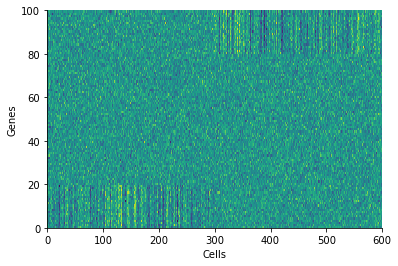

In [39]:
samples1 = stats.multivariate_normal(mu1, S1).rvs(300)
samples2 = stats.multivariate_normal(mu2, S2).rvs(300)

data = np.vstack((samples1, samples2))

plt.pcolormesh(data.T);
plt.ylabel('Genes')
plt.xlabel('Cells');

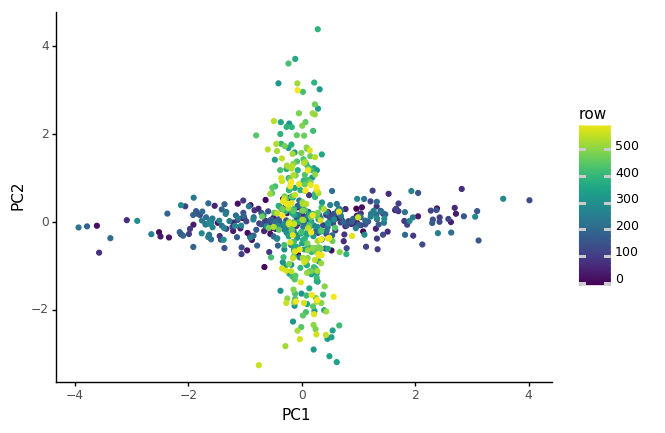

<ggplot: (-9223372036549475156)>

In [40]:
Y = pca.fit_transform(data)
df = pd.DataFrame.from_records(Y, columns=['PC{}'.format(i + 1) for i in range(pca.n_components_)])
df['row'] = df.index

p.qplot('PC1', 'PC2', df, color='row')

In [94]:
mu1 = np.hstack((np.ones(F_G) * 1, np.ones(G - F_G) * 0))
mu2 = np.hstack((np.ones(G - F_G) * 0, np.ones(F_G) * 1))
mu1 += 1.

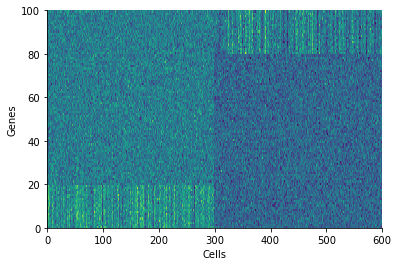

In [95]:
samples1 = stats.multivariate_normal(mu1, S1).rvs(300)
samples2 = stats.multivariate_normal(mu2, S2).rvs(300)

data = np.vstack((samples1, samples2))

plt.pcolormesh(data.T);
plt.ylabel('Genes')
plt.xlabel('Cells');

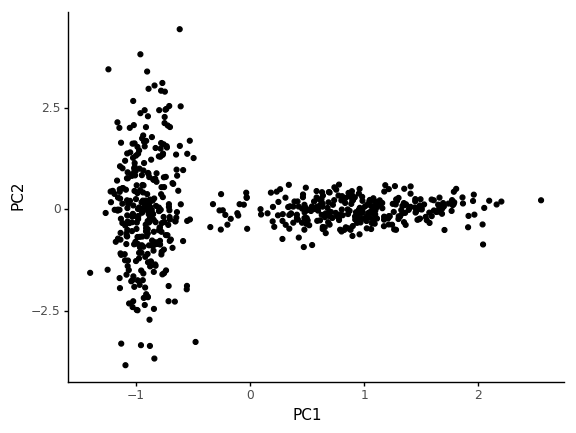

<ggplot: (285460123)>

In [100]:
Y = pca.fit_transform(data)
df = pd.DataFrame.from_records(Y, columns=['PC{}'.format(i + 1) for i in range(pca.n_components_)])
df['row'] = df.index

p.qplot('PC1', 'PC2', df,)

In [101]:
from sklearn.manifold import TSNE

In [179]:
tsne = TSNE(learning_rate=1000, n_iter=1000000, verbose=2, metric='l2', method='exact', early_exaggeration=1.)

In [180]:
Y = tsne.fit_transform(data)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 600 / 600
[t-SNE] Mean sigma: 0.629955
[t-SNE] Iteration 25: error = 1.7115190, gradient norm = 0.0247576
[t-SNE] Iteration 50: error = 1.6922675, gradient norm = 0.0208089
[t-SNE] Iteration 75: error = 1.4512401, gradient norm = 0.0171613
[t-SNE] Iteration 100: error = 1.4917269, gradient norm = 0.0153121
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.491727
[t-SNE] Iteration 125: error = 1.3678047, gradient norm = 0.0139182
[t-SNE] Iteration 150: error = 1.4193065, gradient norm = 0.0140222
[t-SNE] Iteration 175: error = 1.4488675, gradient norm = 0.0132549
[t-SNE] Iteration 175: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 175 iterations: 1.491727


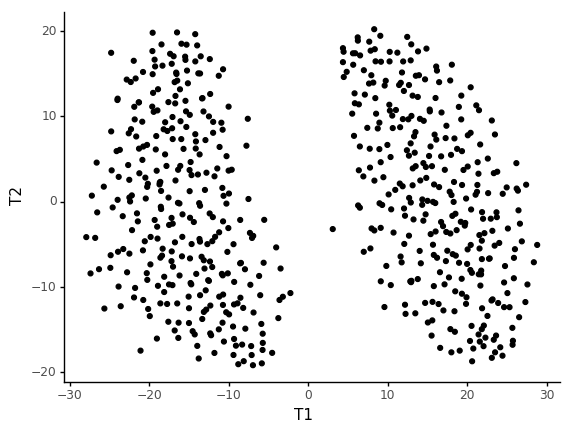

<ggplot: (297769336)>

In [181]:
df = pd.DataFrame.from_records(Y, columns=['T{}'.format(i + 1) for i in range(tsne.n_components)])
df['row'] = df.index

p.qplot('T1', 'T2', df,)

In [182]:
from sklearn.manifold import MDS

In [183]:
mds = MDS(verbose=1, max_iter=1000)

In [184]:
Y = mds.fit_transform(data)

breaking at iteration 623 with stress 5365554.65132
breaking at iteration 687 with stress 5413233.11849
breaking at iteration 628 with stress 5641300.71724
breaking at iteration 840 with stress 5474833.89743


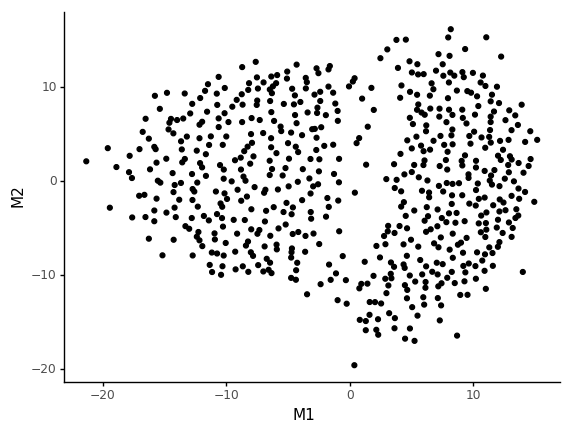

<ggplot: (-9223372036549996600)>

In [185]:
df = pd.DataFrame.from_records(Y, columns=['M{}'.format(i + 1) for i in range(mds.n_components)])
df['row'] = df.index

p.qplot('M1', 'M2', df,)

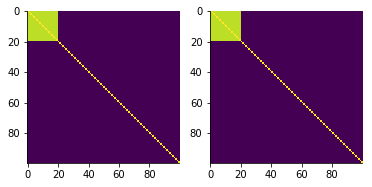

In [31]:
A = np.zeros((F_G, F_G))
O = np.zeros((G - F_G, G - F_G))
O_R = np.zeros((F_G, G - F_G))

ATA = A + 0.9

#A = np.random.randn(F_G, F_G)
#ATA = A.dot(A.T)
#ATA /= ATA.max() * 0.1

S1 = np.bmat([[ATA, O_R], [O_R.T, O]])
np.fill_diagonal(S1, 1)

S2 = np.bmat([[ATA, O_R], [O_R.T, O]])
np.fill_diagonal(S2, 1)

mu1 = np.ones(G) * 1
mu2 = np.ones(G) * 1

plt.subplot(1, 2, 1)
plt.imshow(S1);
plt.subplot(1, 2, 2)
plt.imshow(S2);

In [32]:
mu1 = np.hstack((np.ones(F_G) * 1, np.ones(G - F_G) * 0))
mu2 = np.hstack((np.ones(F_G) * -1, np.ones(G - F_G) * 0))
mu2[:int(F_G / 2)] = 1

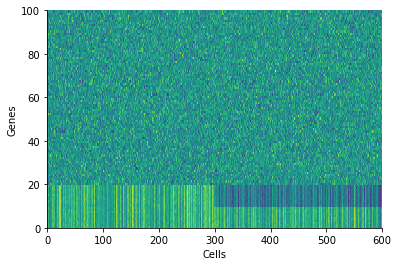

In [33]:
samples1 = stats.multivariate_normal(mu1, S1).rvs(300)
samples2 = stats.multivariate_normal(mu2, S2).rvs(300)

data = np.vstack((samples1, samples2))

plt.pcolormesh(data.T);
plt.ylabel('Genes')
plt.xlabel('Cells');

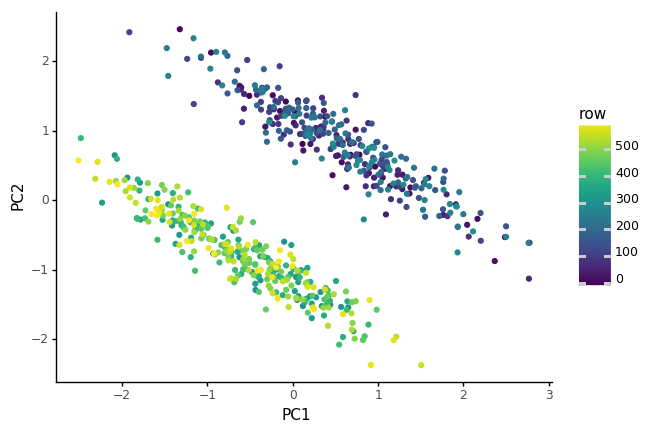

<ggplot: (301298671)>

In [34]:
Y = pca.fit_transform(data)
df = pd.DataFrame.from_records(Y, columns=['PC{}'.format(i + 1) for i in range(pca.n_components_)])
df['row'] = df.index

p.qplot('PC1', 'PC2', df, color='row')